<a href="https://colab.research.google.com/github/michellee-wang/loan-predict-fsa-symposium/blob/main/loan_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [39]:
df = pd.read_csv('/content/LoanPredictions.csv') #imports the game csv
print(df.shape) #prints the # of (rows, col)
df.head() #previews first few rows of the data

(598, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


cleaning the data

In [40]:
print(df.isnull().sum())

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64


In [41]:
num = df.select_dtypes('number').columns.to_list()
print(num)
cat = df.select_dtypes('object').columns.to_list()
print(cat)

['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [42]:
#fill in missing values
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])  # mode for credit history
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])  # mode for dependents

visualizations

Text(0.5, 0, 'Loan Amount')

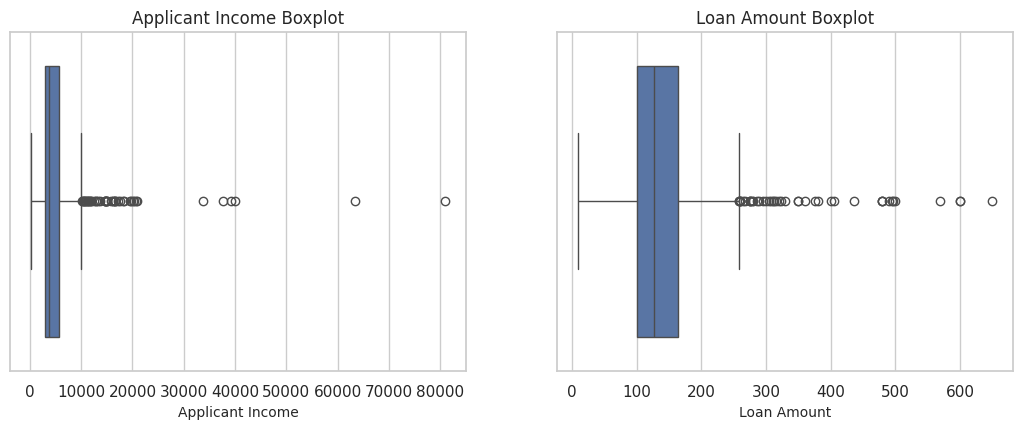

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))
gs = GridSpec(3, 3)

#show outliers income
plt.subplot(gs[1, 0])
sns.boxplot(x=df['ApplicantIncome'])
plt.title('Applicant Income Boxplot', fontsize=12)
plt.xlabel('Applicant Income', fontsize=10)

#loan dist
plt.subplot(gs[1, 1])
sns.boxplot(x=df['LoanAmount'].dropna())
plt.title('Loan Amount Boxplot', fontsize=12)
plt.xlabel('Loan Amount', fontsize=10)

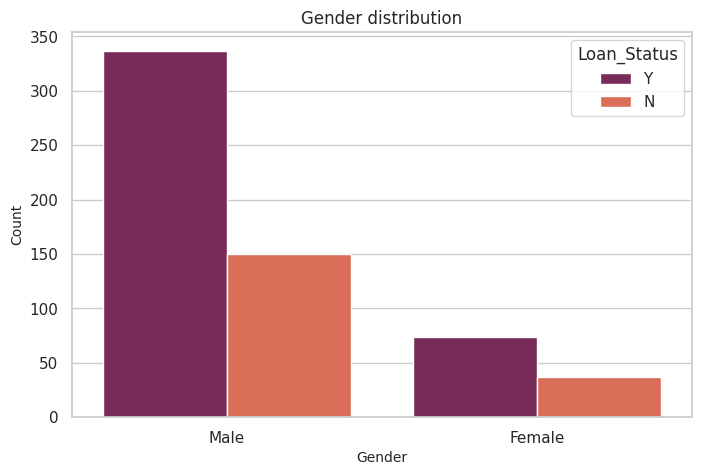

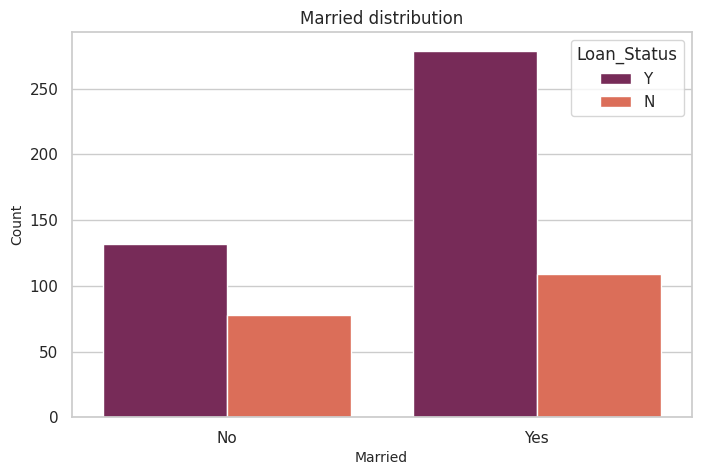

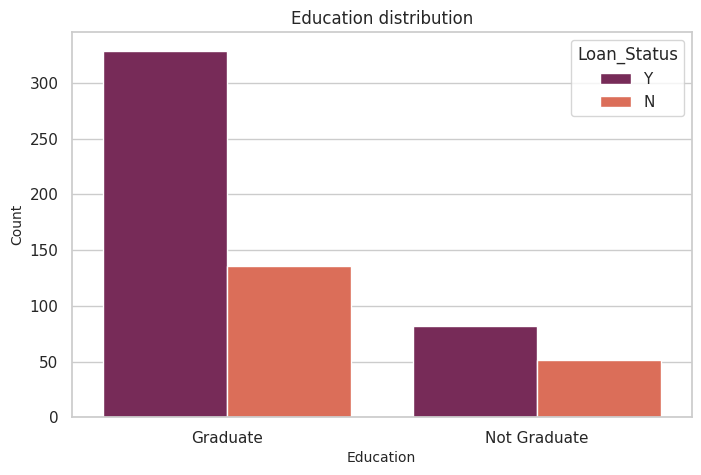

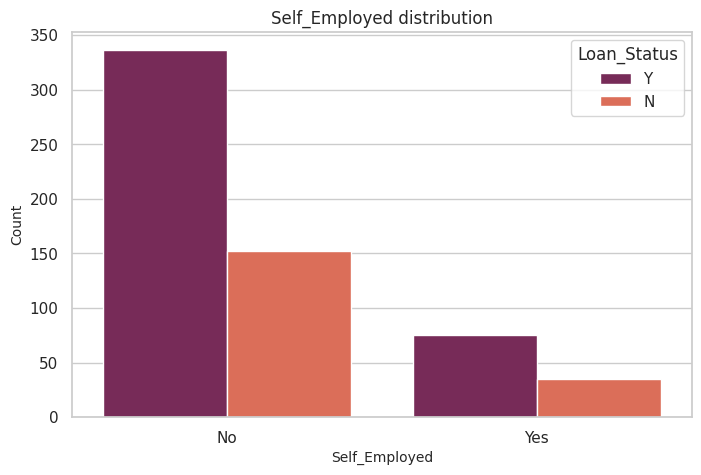

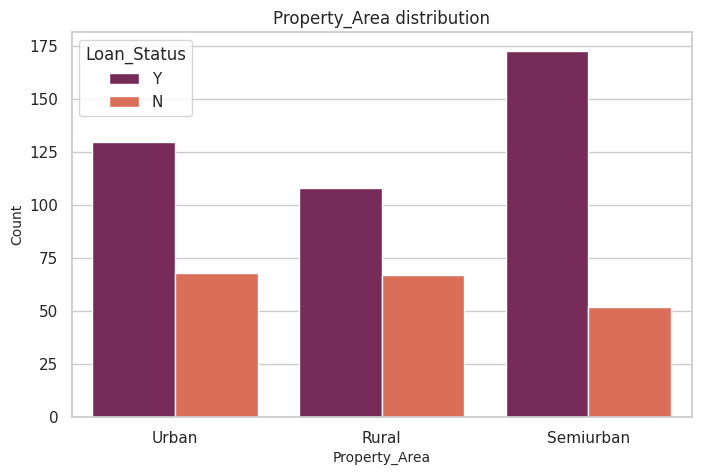

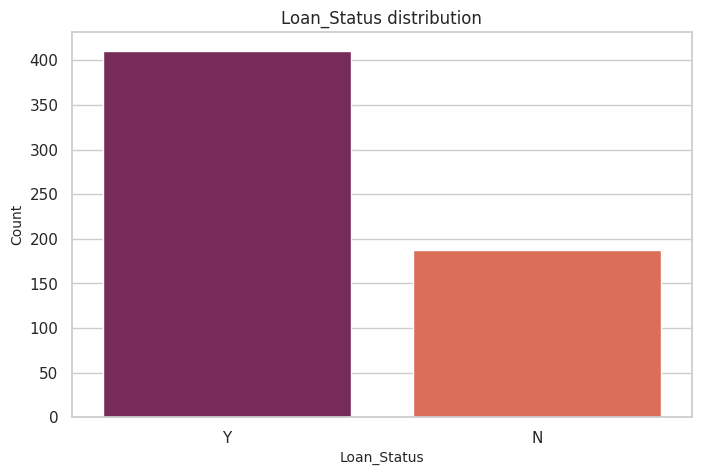

In [44]:
sns.color_palette("rocket")

for i in cat[1:]:
  plt.figure(figsize=(8,5))
  sns.countplot(x=i, data=df, hue="Loan_Status", palette='rocket')
  plt.title(i + " distribution", fontsize=12)
  plt.xlabel(i, fontsize=10)
  plt.ylabel('Count', fontsize=10)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<Axes: >

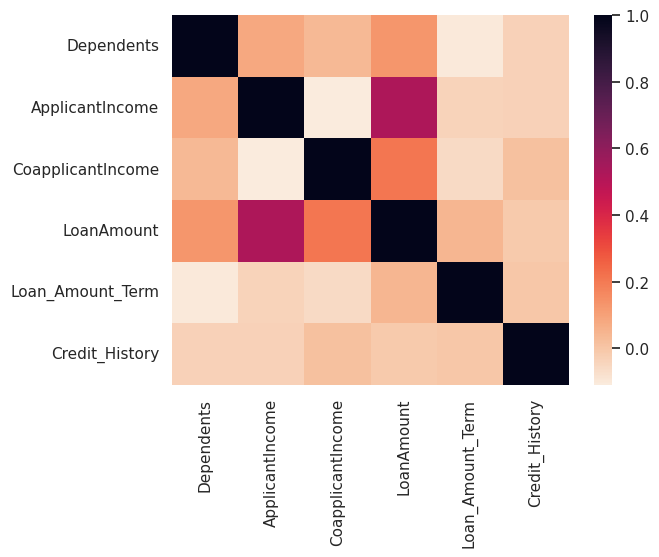

In [45]:
print(df.isnull().sum())
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, cmap='rocket_r')

In [46]:
#one-hot encoding
cat = df.select_dtypes('object').columns.to_list()
df = pd.get_dummies(df, columns=cat[:-1], drop_first=True) #ignores loan_status but encodes the rest
#drop_first avoids the "dummy variable trap" (perfect multicollinearity)

#loan status turns numeric/binary
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

#removes id column
print(df.isnull().sum())

Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
                          ..
Married_Yes                0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Length: 610, dtype: int64


In [47]:
#XGBoost
#gradient boost
#Random Forest
#Decision Trees
#CatBoost


data split into training + testing

In [48]:
from sklearn.model_selection import train_test_split

X = df.drop('Loan_Status', axis=1)  # Features
y = df['Loan_Status']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

In [49]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")

Decision Tree Accuracy: 0.8083333333333333


In [50]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.8


In [51]:
#gradientboosting
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f"Gradient Boosting Accuracy: {gb_accuracy}")

Gradient Boosting Accuracy: 0.8083333333333333


In [52]:
#xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy}")

XGBoost Accuracy: 0.7833333333333333
